In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline



In [2]:
# Load dataset
df = pd.read_csv("Loan_Default.csv")

# Drop unnecessary columns
df.drop(columns=['ID', 'year'], inplace=True)

# Split features and target
X = df.drop(columns=['Status'])
y = df['Status']


In [3]:
df.head()
df.info() ,df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 32 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   loan_limit                 145326 non-null  object 
 1   Gender                     148670 non-null  object 
 2   approv_in_adv              147762 non-null  object 
 3   loan_type                  148670 non-null  object 
 4   loan_purpose               148536 non-null  object 
 5   Credit_Worthiness          148670 non-null  object 
 6   open_credit                148670 non-null  object 
 7   business_or_commercial     148670 non-null  object 
 8   loan_amount                148670 non-null  int64  
 9   rate_of_interest           112231 non-null  float64
 10  Interest_rate_spread       112031 non-null  float64
 11  Upfront_charges            109028 non-null  float64
 12  term                       148629 non-null  float64
 13  Neg_ammortization          14

(None,
         loan_amount  rate_of_interest  Interest_rate_spread  Upfront_charges  \
 count  1.486700e+05     112231.000000         112031.000000    109028.000000   
 mean   3.311177e+05          4.045476              0.441656      3224.996127   
 std    1.839093e+05          0.561391              0.513043      3251.121510   
 min    1.650000e+04          0.000000             -3.638000         0.000000   
 25%    1.965000e+05          3.625000              0.076000       581.490000   
 50%    2.965000e+05          3.990000              0.390400      2596.450000   
 75%    4.365000e+05          4.375000              0.775400      4812.500000   
 max    3.576500e+06          8.000000              3.357000     60000.000000   
 
                 term  property_value         income   Credit_Score  \
 count  148629.000000    1.335720e+05  139520.000000  148670.000000   
 mean      335.136582    4.978935e+05    6957.338876     699.789103   
 std        58.409084    3.599353e+05    6496.586

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay



In [5]:
# Load dataset
df = pd.read_csv("Loan_Default.csv")





In [6]:
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [7]:
X = df.drop(columns=['Status'])
y = df['Status']



In [8]:
df.columns

Index(['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type',
       'Status', 'dtir1'],
      dtype='object')

In [9]:
# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [10]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((118936, 33), (29734, 33), (118936,), (29734,))

In [11]:

# Identify column types
num_cols = X_train.select_dtypes(include=['float64', 'int64']).columns
cat_cols = X_train.select_dtypes(include='object').columns


In [12]:
num_cols, cat_cols


(Index(['ID', 'year', 'loan_amount', 'rate_of_interest', 'Interest_rate_spread',
        'Upfront_charges', 'term', 'property_value', 'income', 'Credit_Score',
        'LTV', 'dtir1'],
       dtype='object'),
 Index(['loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose',
        'Credit_Worthiness', 'open_credit', 'business_or_commercial',
        'Neg_ammortization', 'interest_only', 'lump_sum_payment',
        'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
        'credit_type', 'co-applicant_credit_type', 'age',
        'submission_of_application', 'Region', 'Security_Type'],
       dtype='object'))

In [14]:
from sklearn.preprocessing import MinMaxScaler


# Preprocessing pipeline
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler())
])
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipeline, cat_cols)
])


In [ ]:

# transformation
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)


In [16]:
X_test_preprocessed.shape, X_train_preprocessed.shape 
X_test_preprocessed, X_train_preprocessed

(array([[0.3993166 , 0.        , 0.18318318, ..., 1.        , 0.        ,
         1.        ],
        [0.00707612, 0.        , 0.07207207, ..., 0.        , 0.        ,
         1.        ],
        [0.40131433, 0.        , 0.07807808, ..., 1.        , 0.        ,
         1.        ],
        ...,
        [0.52875852, 0.        , 0.13513514, ..., 1.        , 0.        ,
         1.        ],
        [0.12565498, 0.        , 0.04804805, ..., 0.        , 0.        ,
         1.        ],
        [0.90800369, 0.        , 0.05405405, ..., 1.        , 0.        ,
         1.        ]]),
 array([[0.94867794, 0.        , 0.05705706, ..., 1.        , 0.        ,
         1.        ],
        [0.81574504, 0.        , 0.13513514, ..., 0.        , 0.        ,
         1.        ],
        [0.07542931, 0.        , 0.09309309, ..., 0.        , 0.        ,
         1.        ],
        ...,
        [0.76235126, 0.        , 0.2042042 , ..., 0.        , 0.        ,
         1.        ],
        [0.2

In [ ]:
# Build ANN model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_preprocessed.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(X_train_preprocessed, y_train, epochs=20, batch_size=64, validation_split=0.2, verbose=1)



c:\Users\HP\miniconda3\envs\ml-env\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
1487/1487 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8367 - loss: 0.4147 - val_accuracy: 0.8657 - val_loss: 0.3479
Epoch 2/20
1487/1487 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8666 - loss: 0.3510 - val_accuracy: 0.8666 - val_loss: 0.3359
Epoch 3/20
1487/1487 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8698 - loss: 0.3302 - val_accuracy: 0.8767 - val_loss: 0.2888
Epoch 4/20
1487/1487 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8798 - loss: 0.2840 - val_accuracy: 0.9002 - val_loss: 0.2310
Epoch 5/20
1487/1487 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9016 - loss: 0.2192 - val_accuracy: 0.9331 - val_loss: 0.1392
Epoch 6/20
1487/1487 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9302 - loss: 0.1521 - val_accuracy: 0.9497 - val_loss: 0.1129
Epoch 7/20
1487/1487 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9372 - loss: 0.1329 - val_accuracy: 0.9596 - val_loss: 0.0973
Epoch 8/20
1487/1487 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9420 - loss: 0.1237 - 

In [19]:
# Evaluate model
loss, accuracy = model.evaluate(X_test_preprocessed, y_test)
print(f"Test Accuracy: {accuracy:.4f}")


930/930 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9722 - loss: 0.0780
Test Accuracy: 0.9724


930/930 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


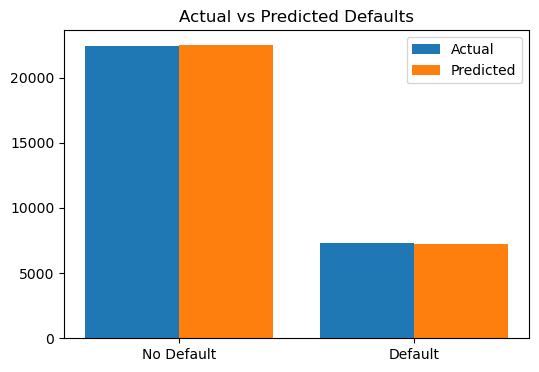

In [ ]:
# Predict
y_pred = (model.predict(X_test_preprocessed) > 0.5).astype(int)


plt.figure(figsize=(6, 4))
plt.hist([y_test, y_pred.flatten()], label=["Actual", "Predicted"], bins=[-0.5, 0.5, 1.5], align='mid', rwidth=0.8)
plt.xticks([0, 1], ['No Default', 'Default'])
plt.title("Actual vs Predicted Defaults")
plt.legend()
plt.show()



### Default and No Default

 "Default" and "No Default" describe the status of a loan:

- **Default**: Indicates that the borrower failed to meet the repayment obligations as per the loan agreement. This is represented by a value of `1` in the `Status` column of the dataset.

- **No Default**: Indicates that the borrower successfully met the repayment obligations. This is represented by a value of `0` in the `Status` column of the dataset.

These labels are used as the target variable (`y`) for training and evaluating the machine learning model to predict loan repayment behavior.


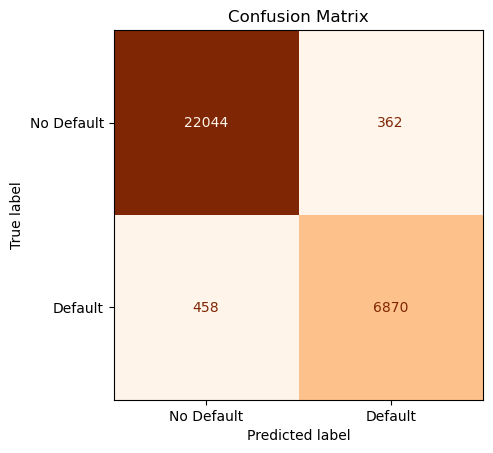

In [26]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Default", "Default"])
disp.plot(cmap=plt.cm.Oranges, colorbar=False)
plt.title("Confusion Matrix")
plt.show()

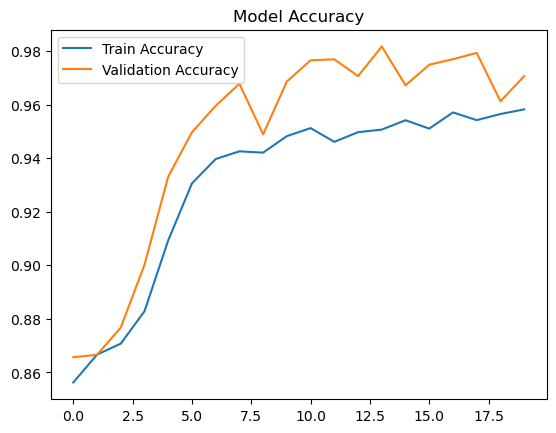

In [ ]:

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.show()
